<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Python multithreading module

_Instructor: Aymeric Flaisler_

---

The **threading module** builds on the **low-level features of thread** to make working with threads easier and more pythonic.  

Using threads allows a program to run **multiple operations concurrently** in the same process space.



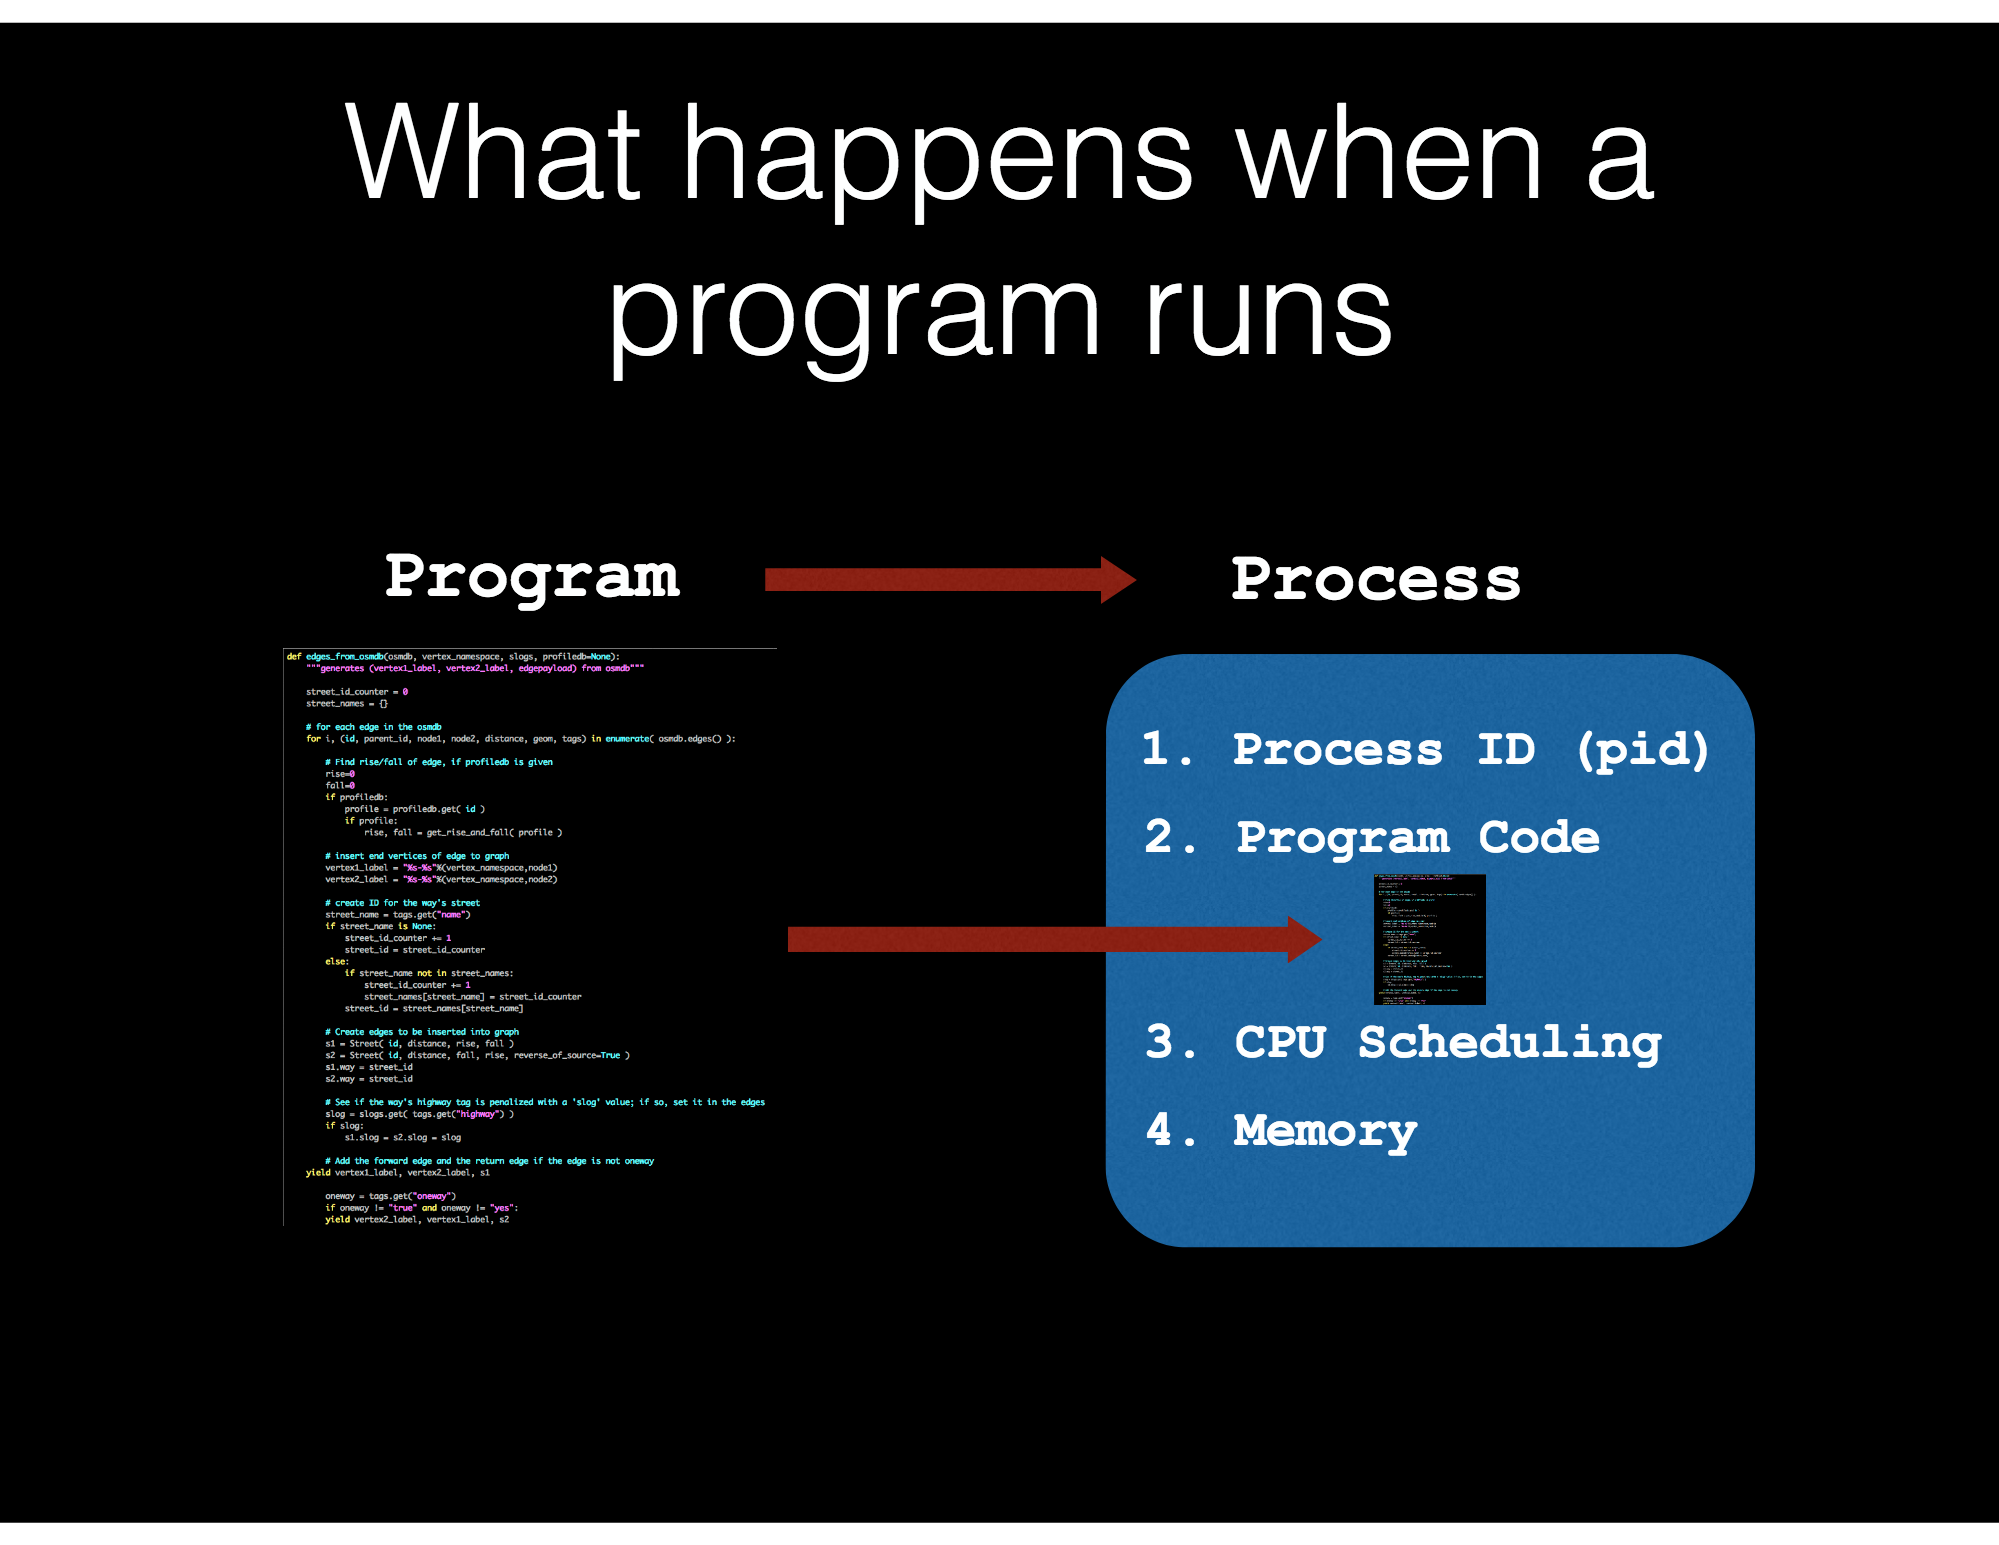

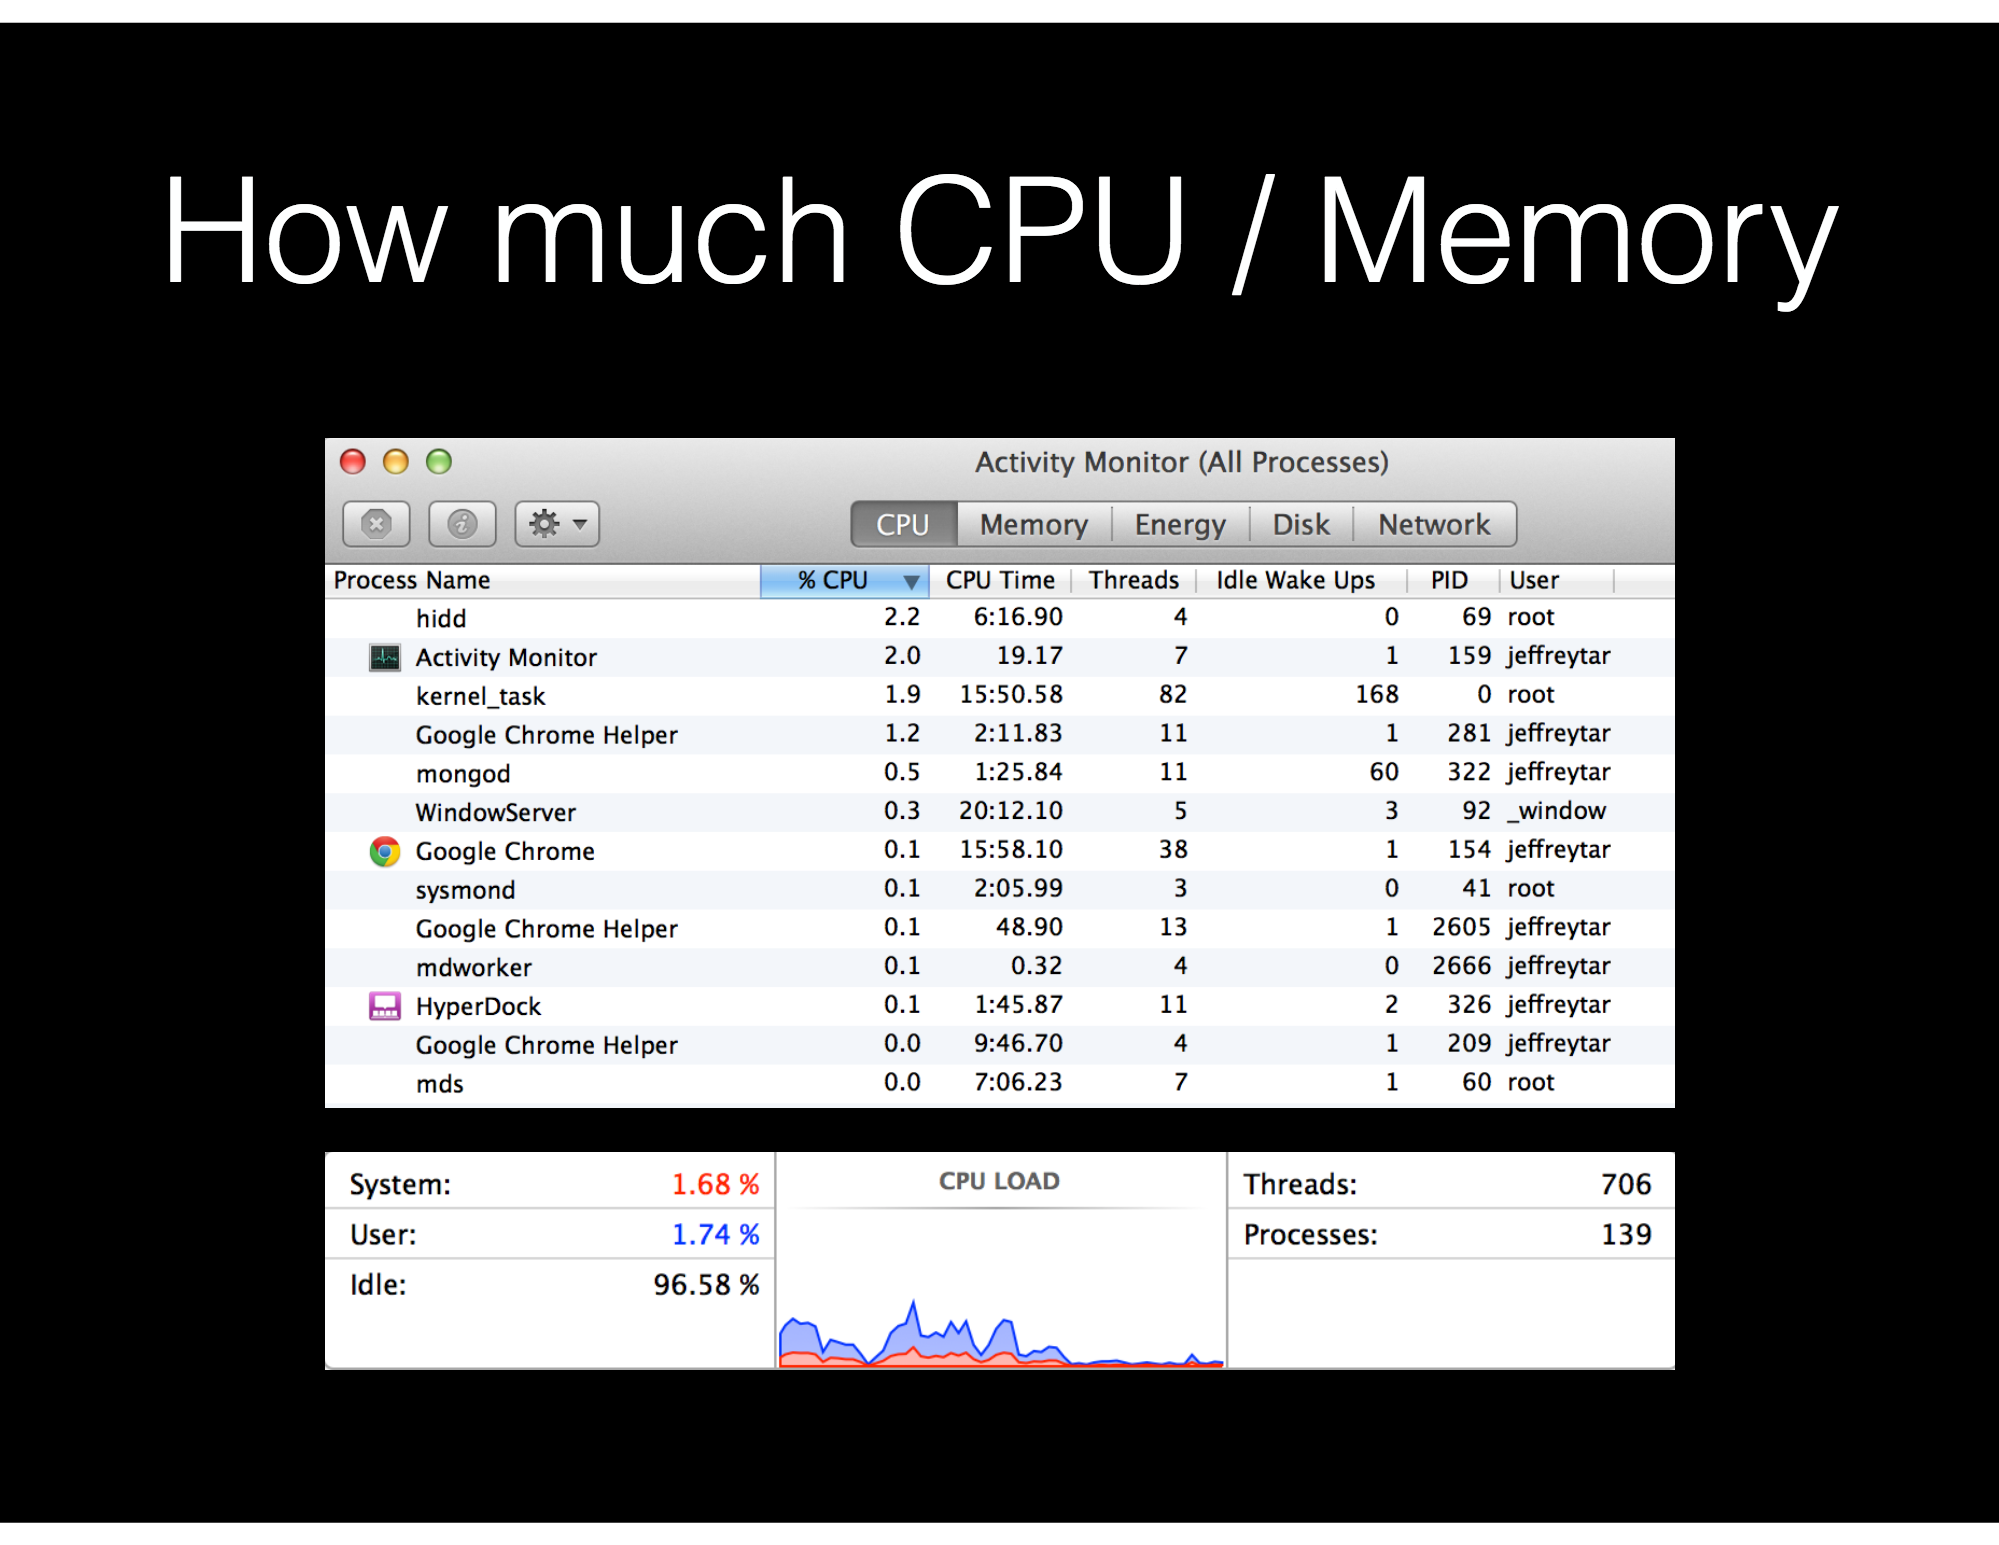

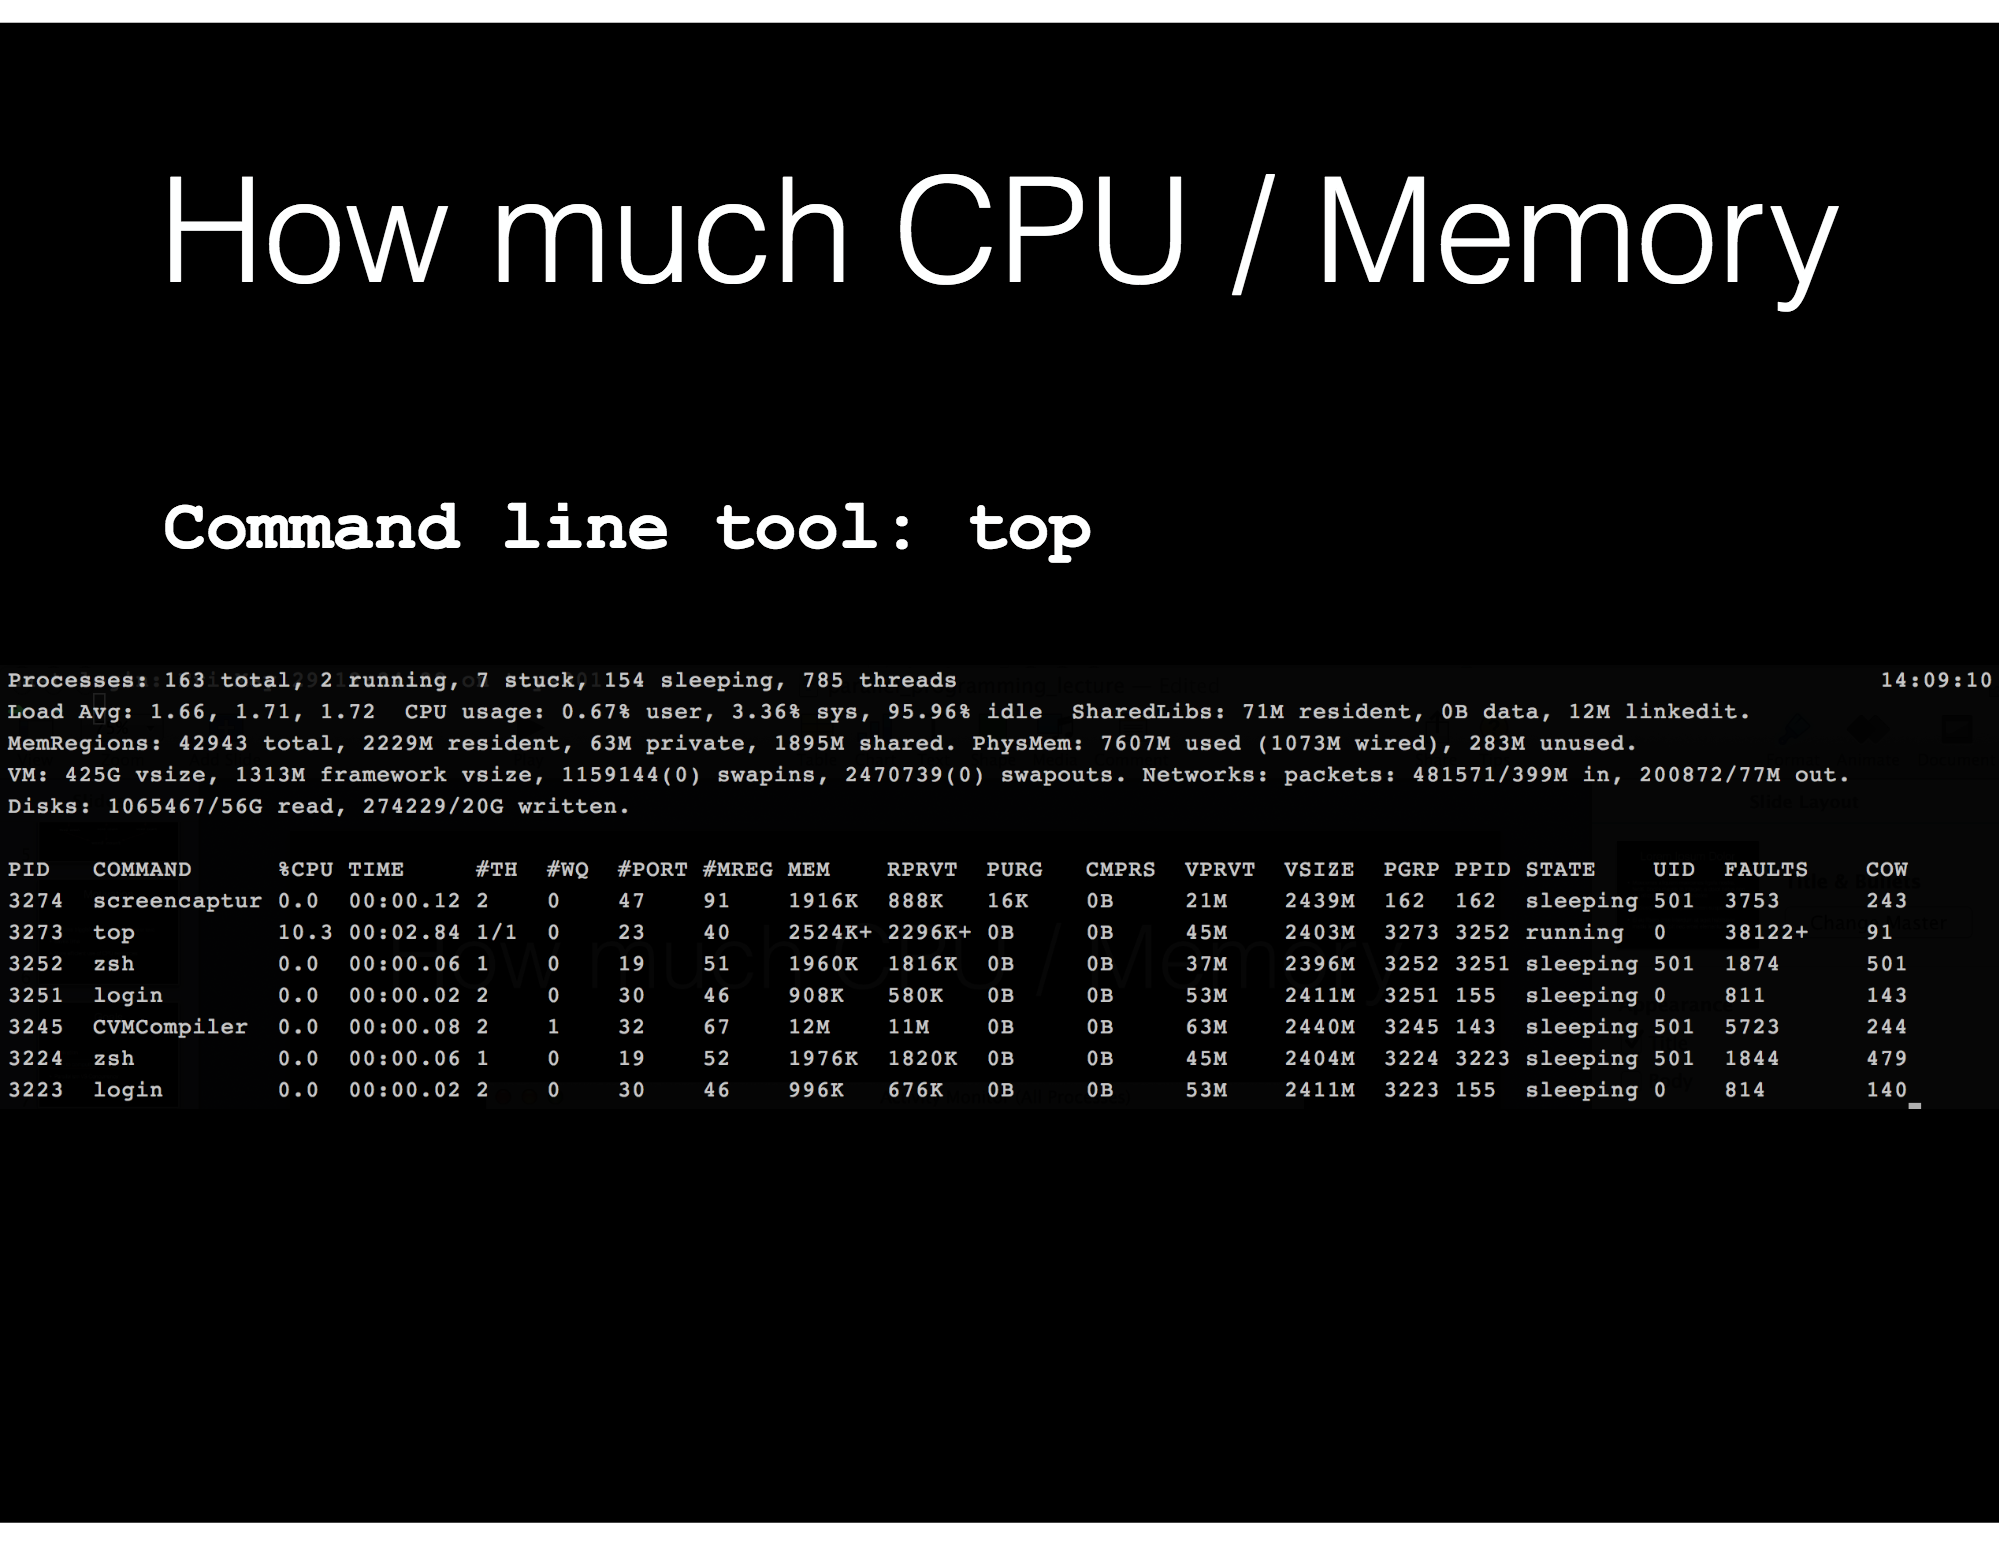

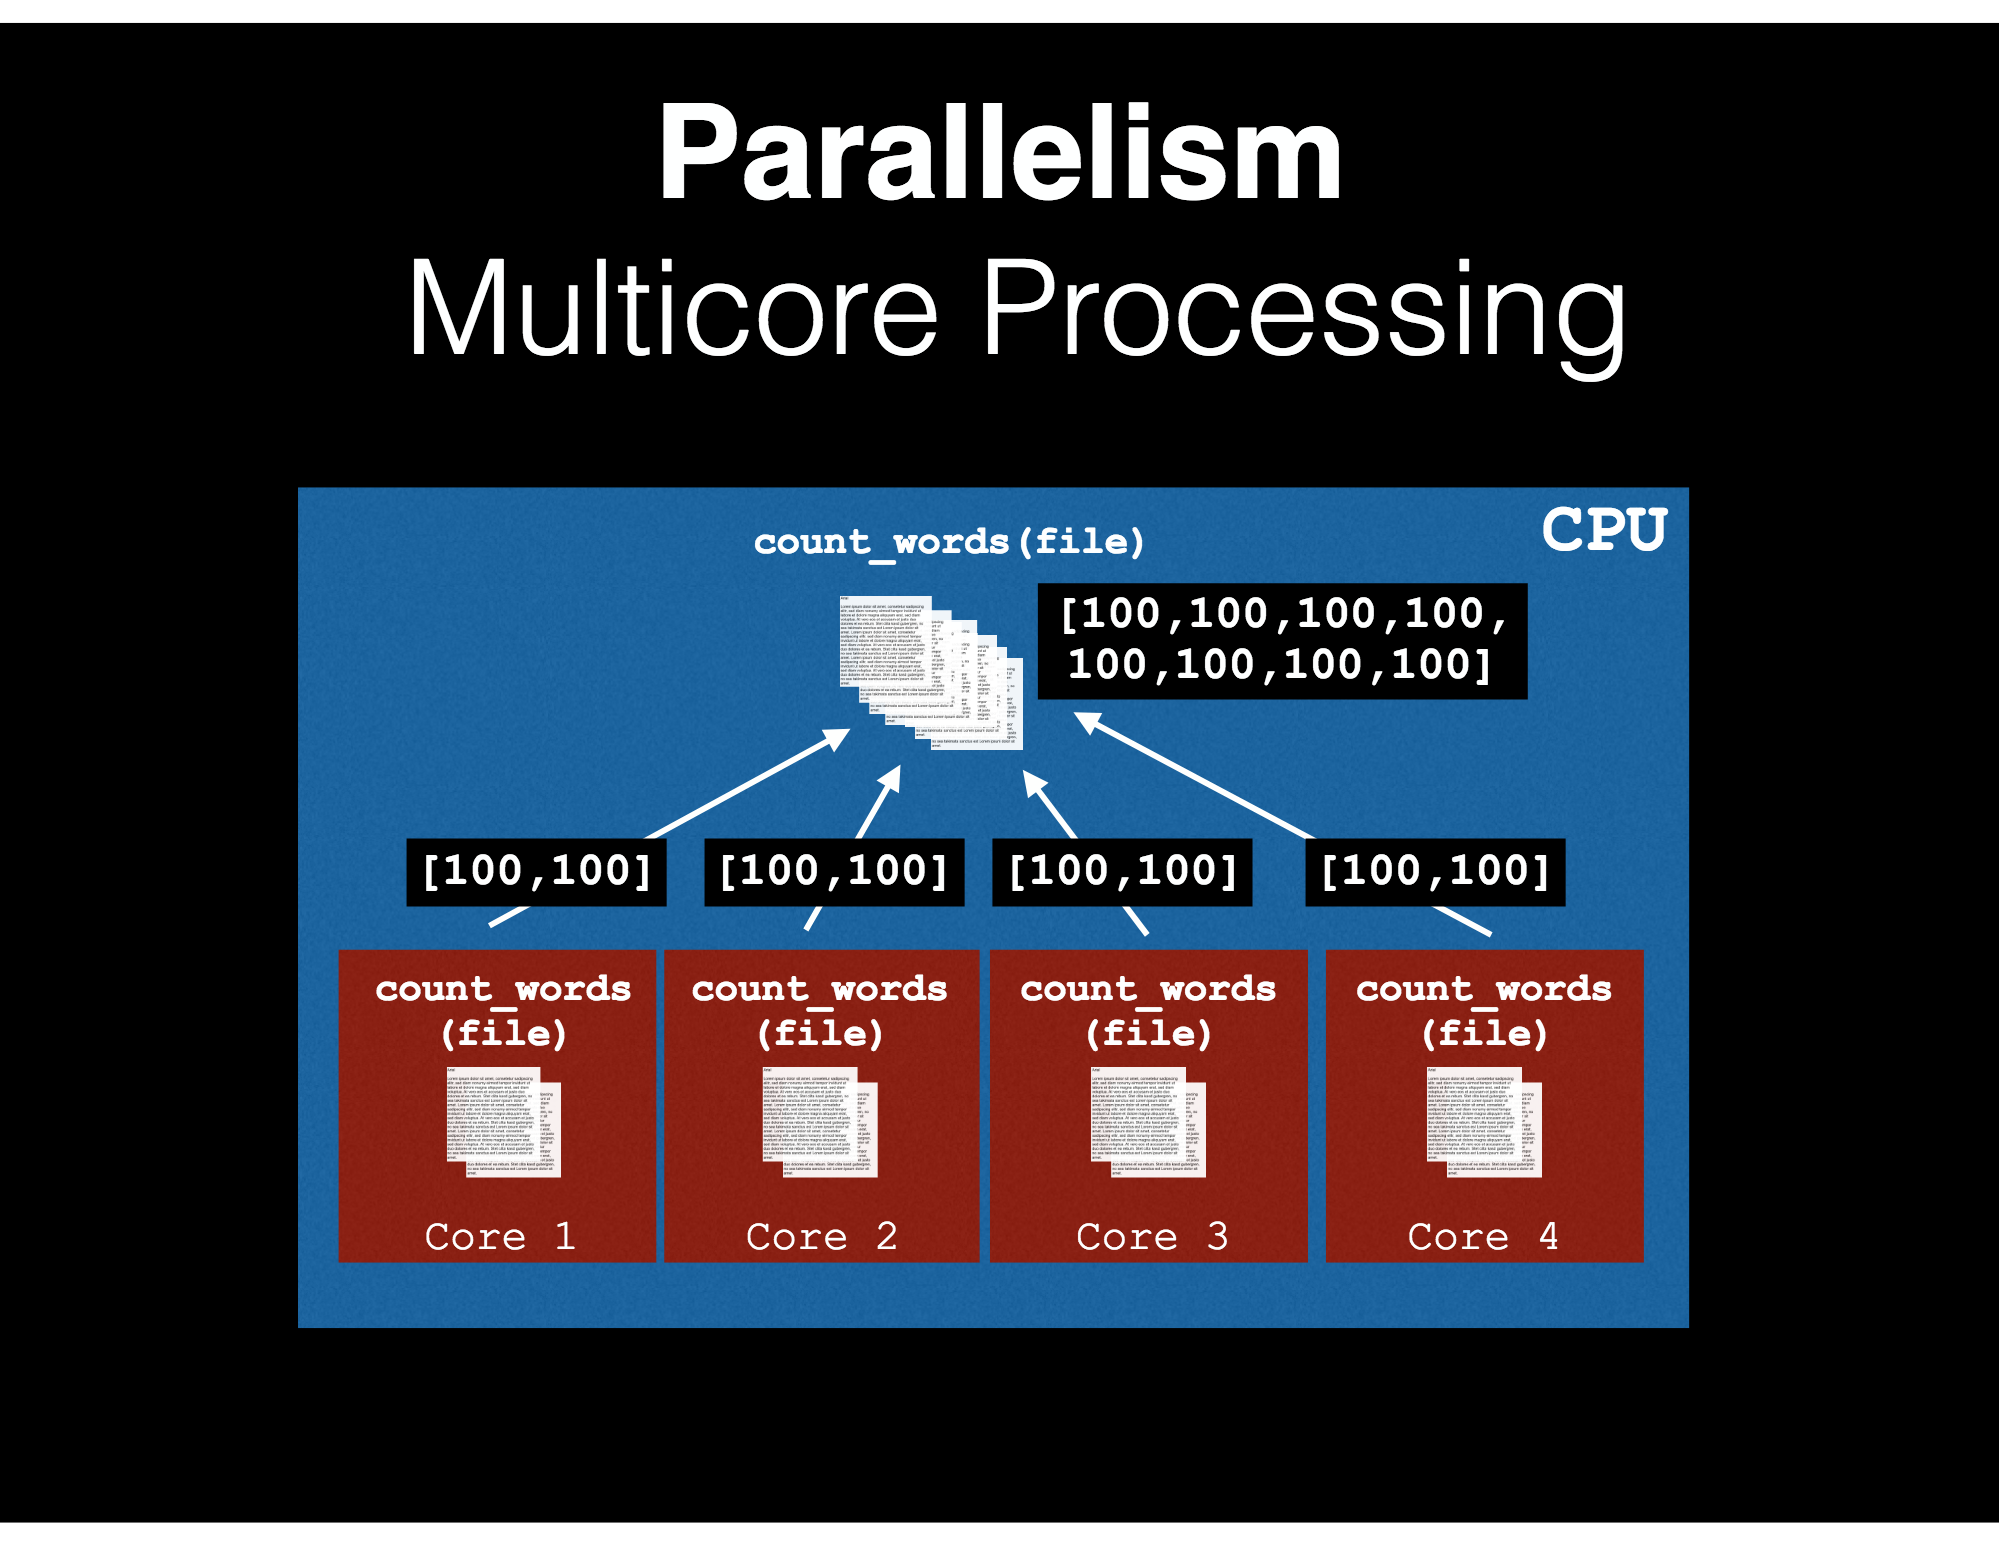

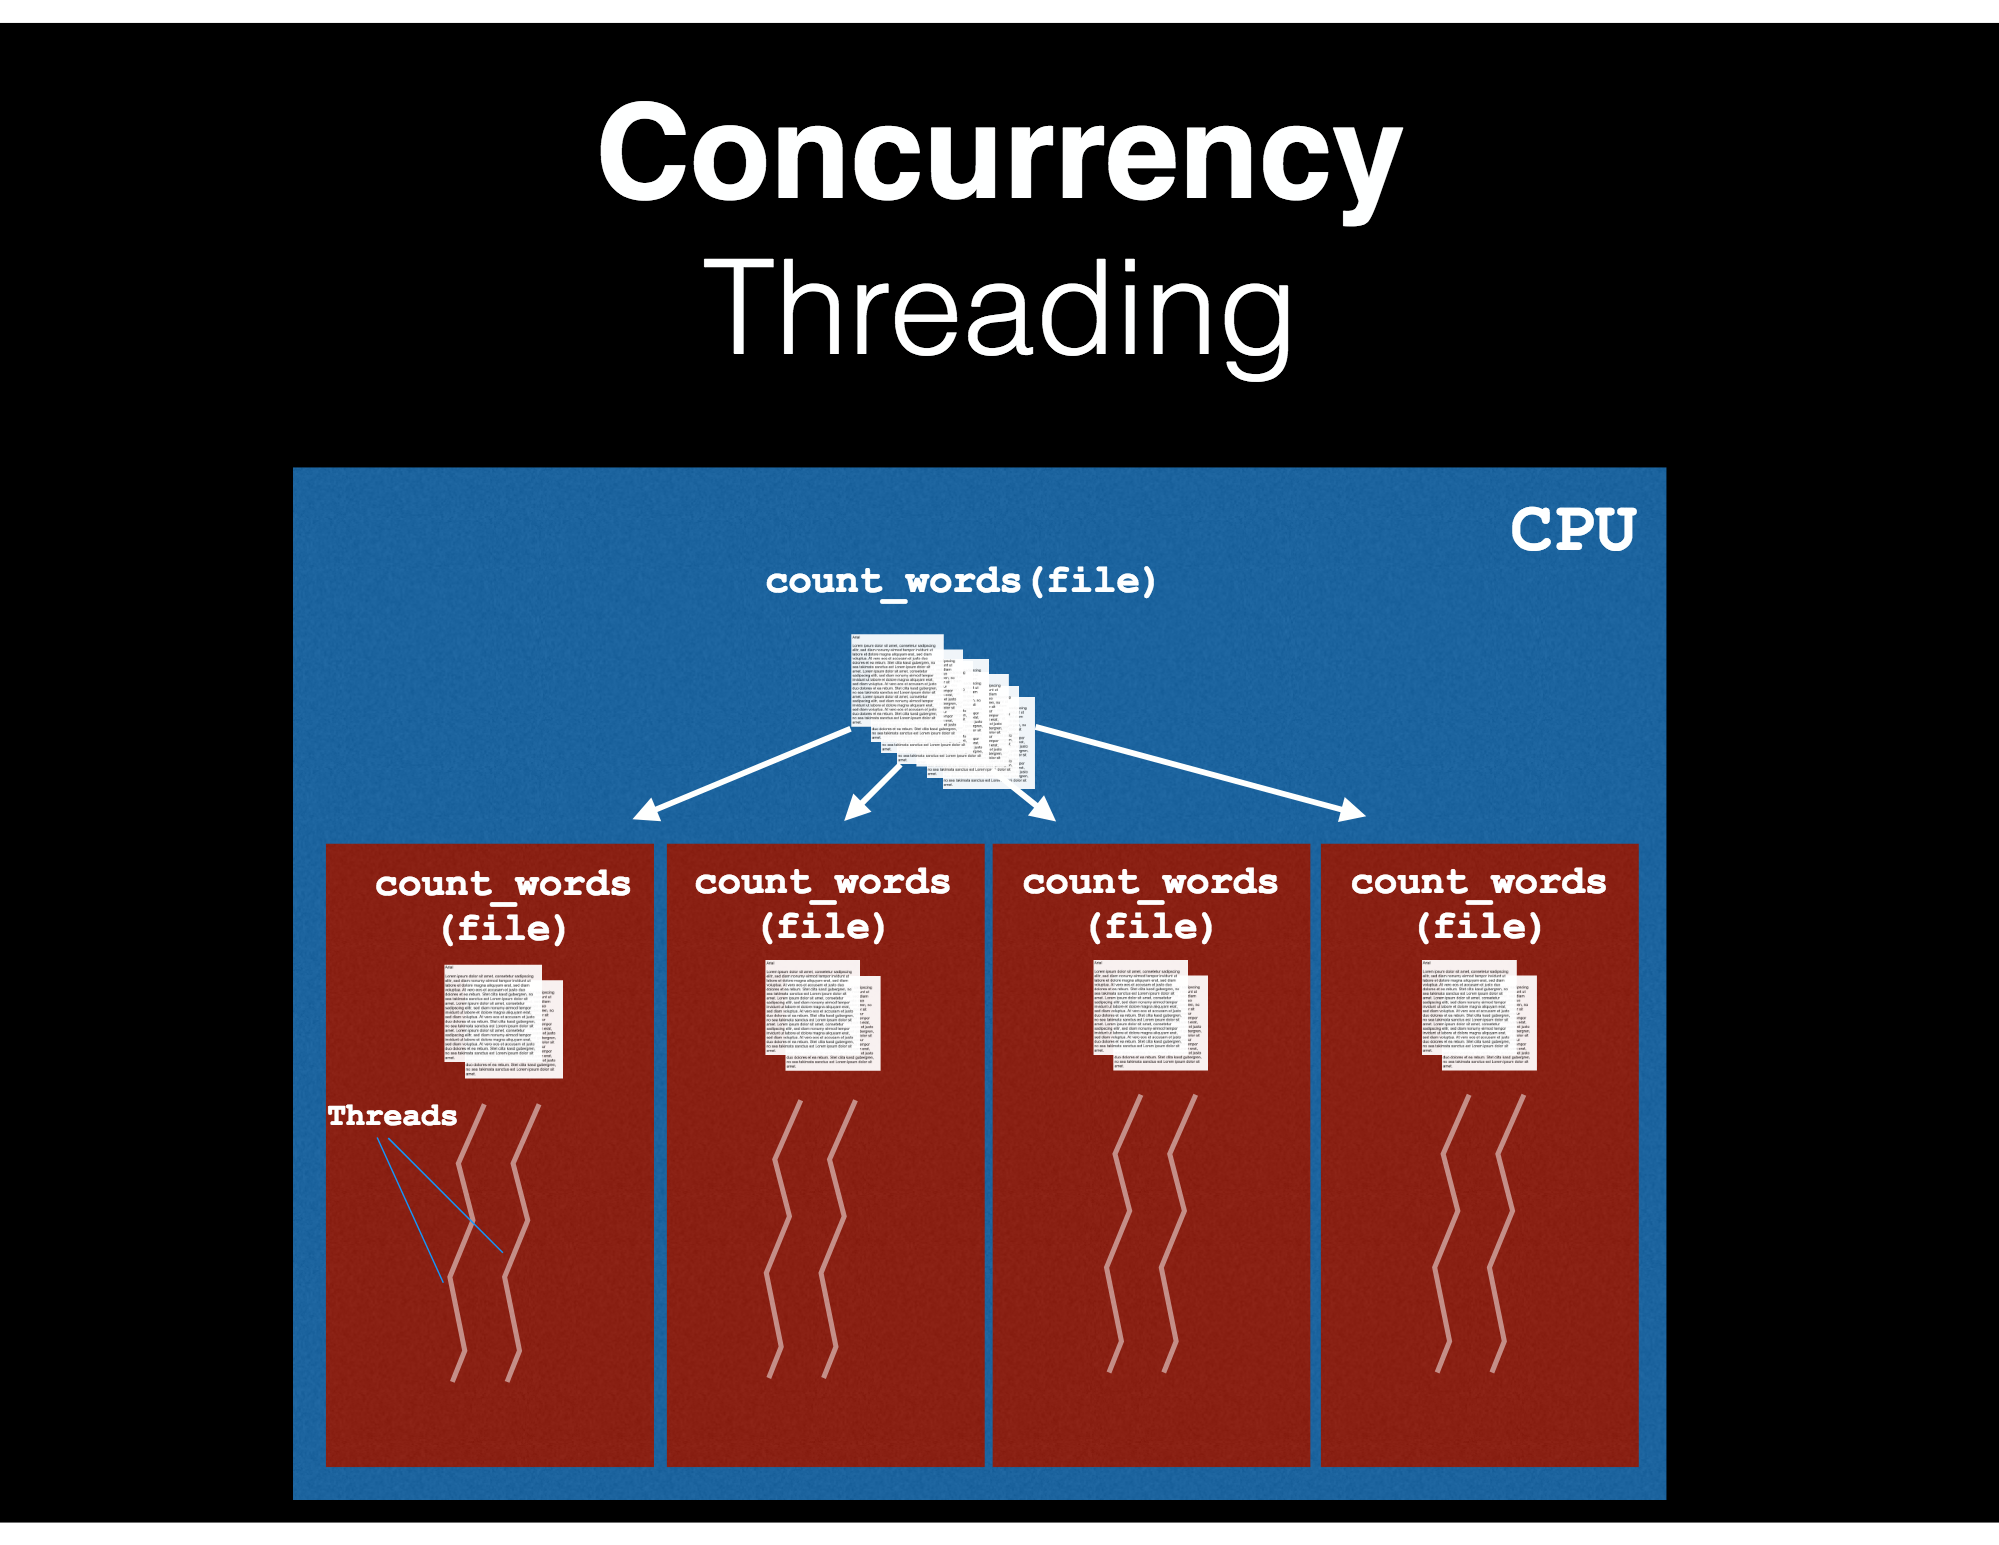

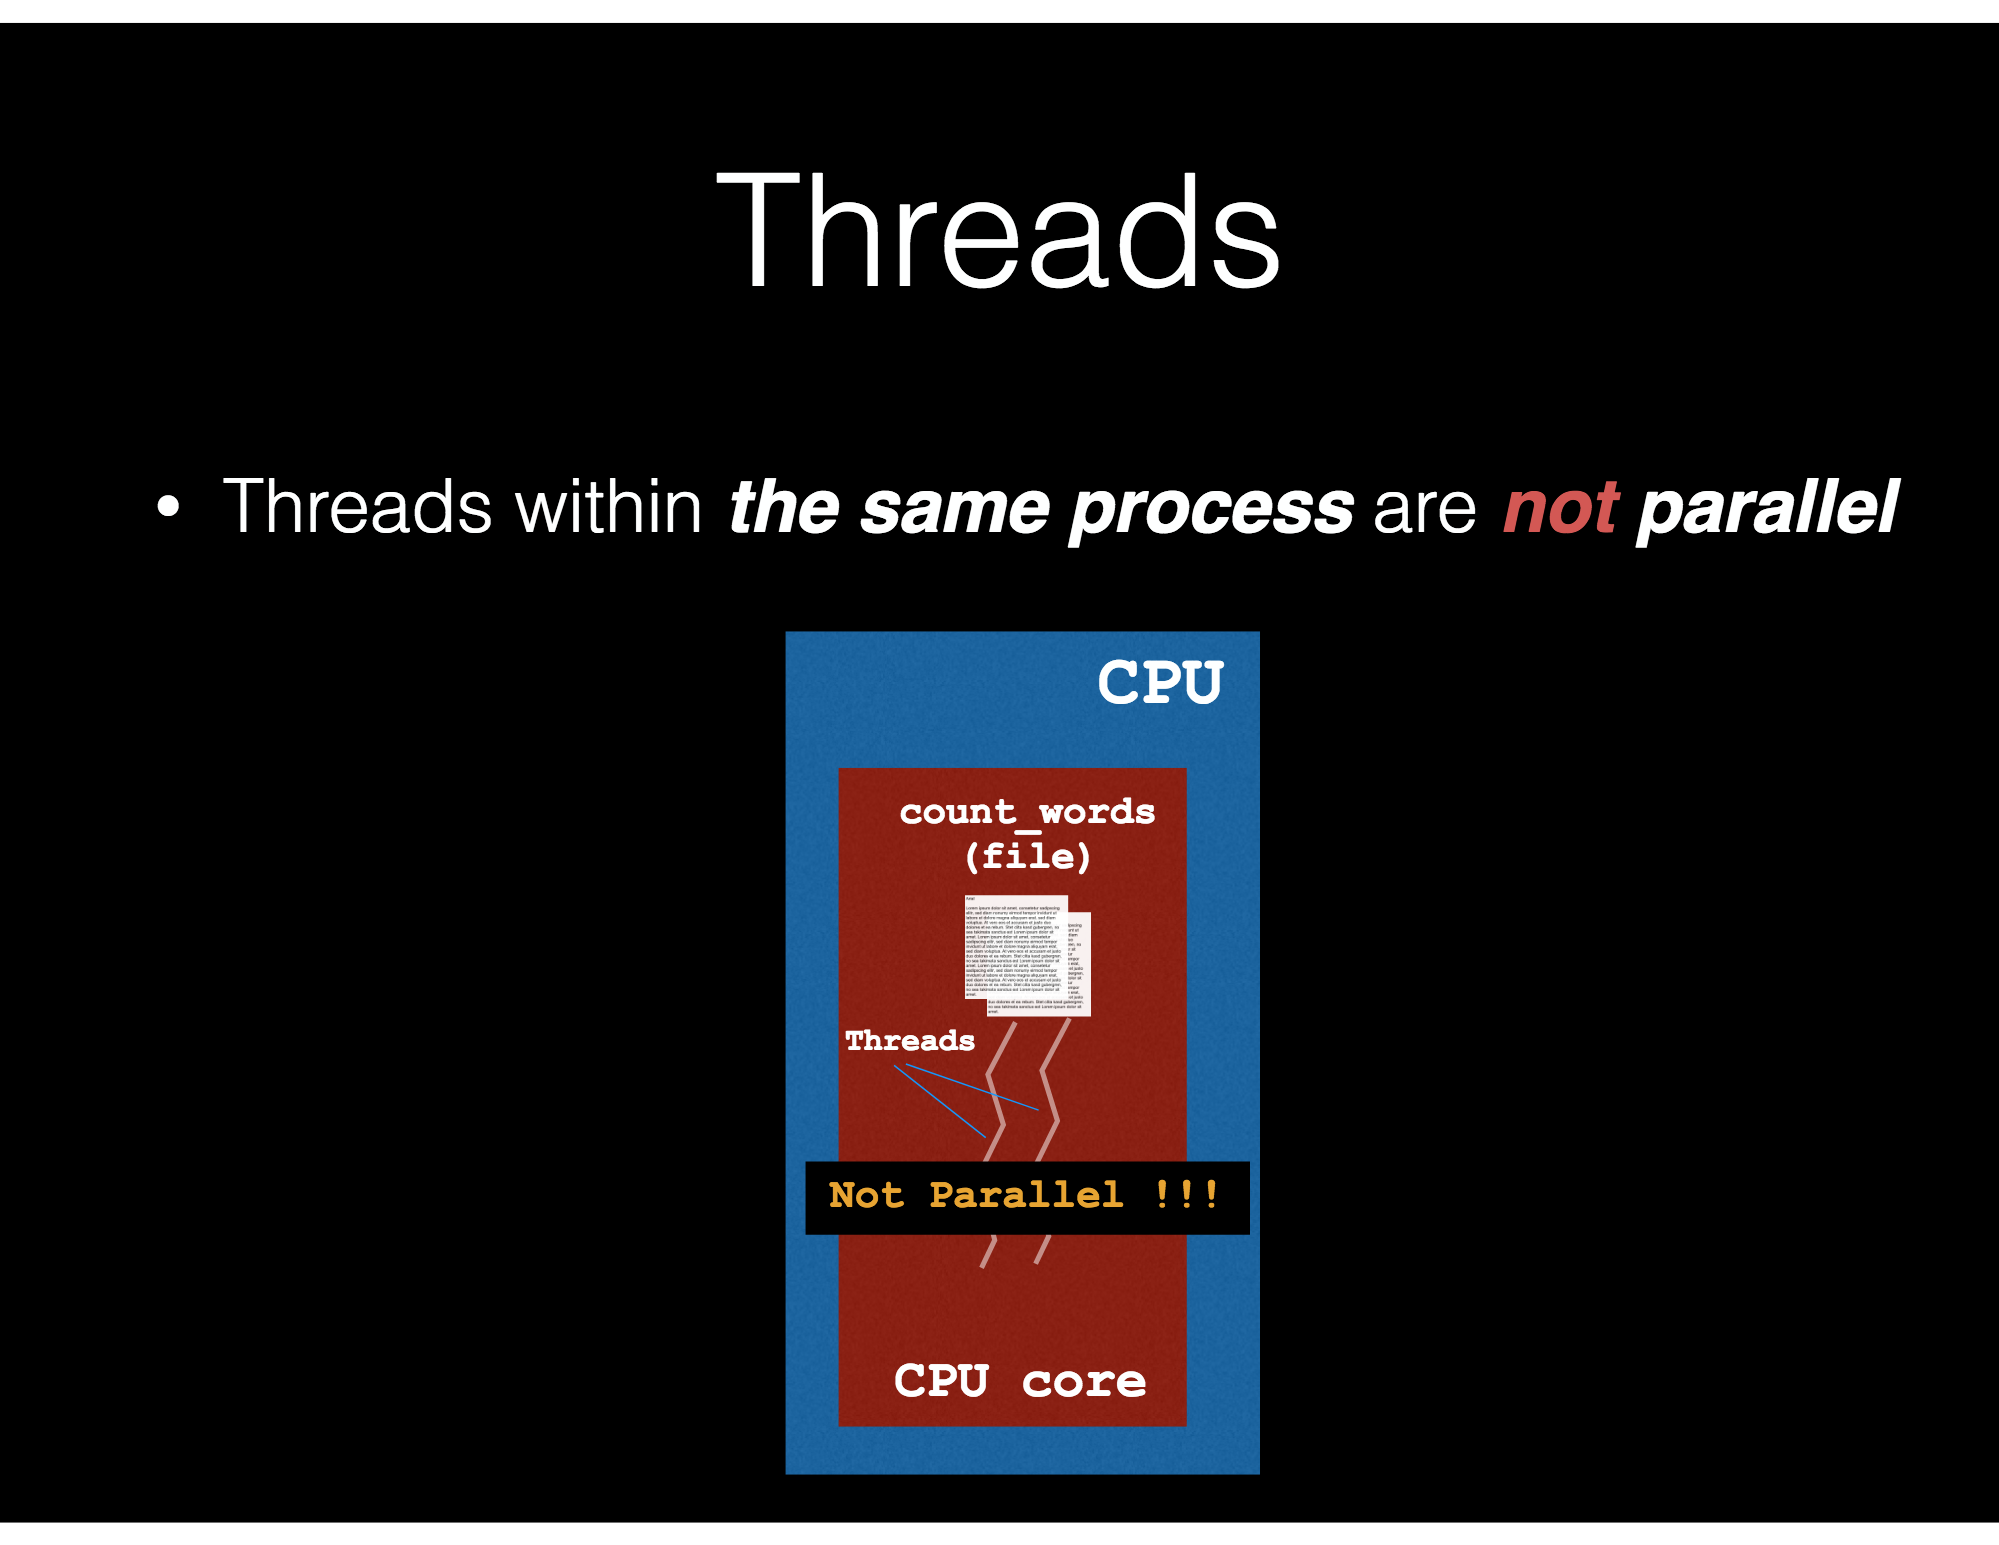

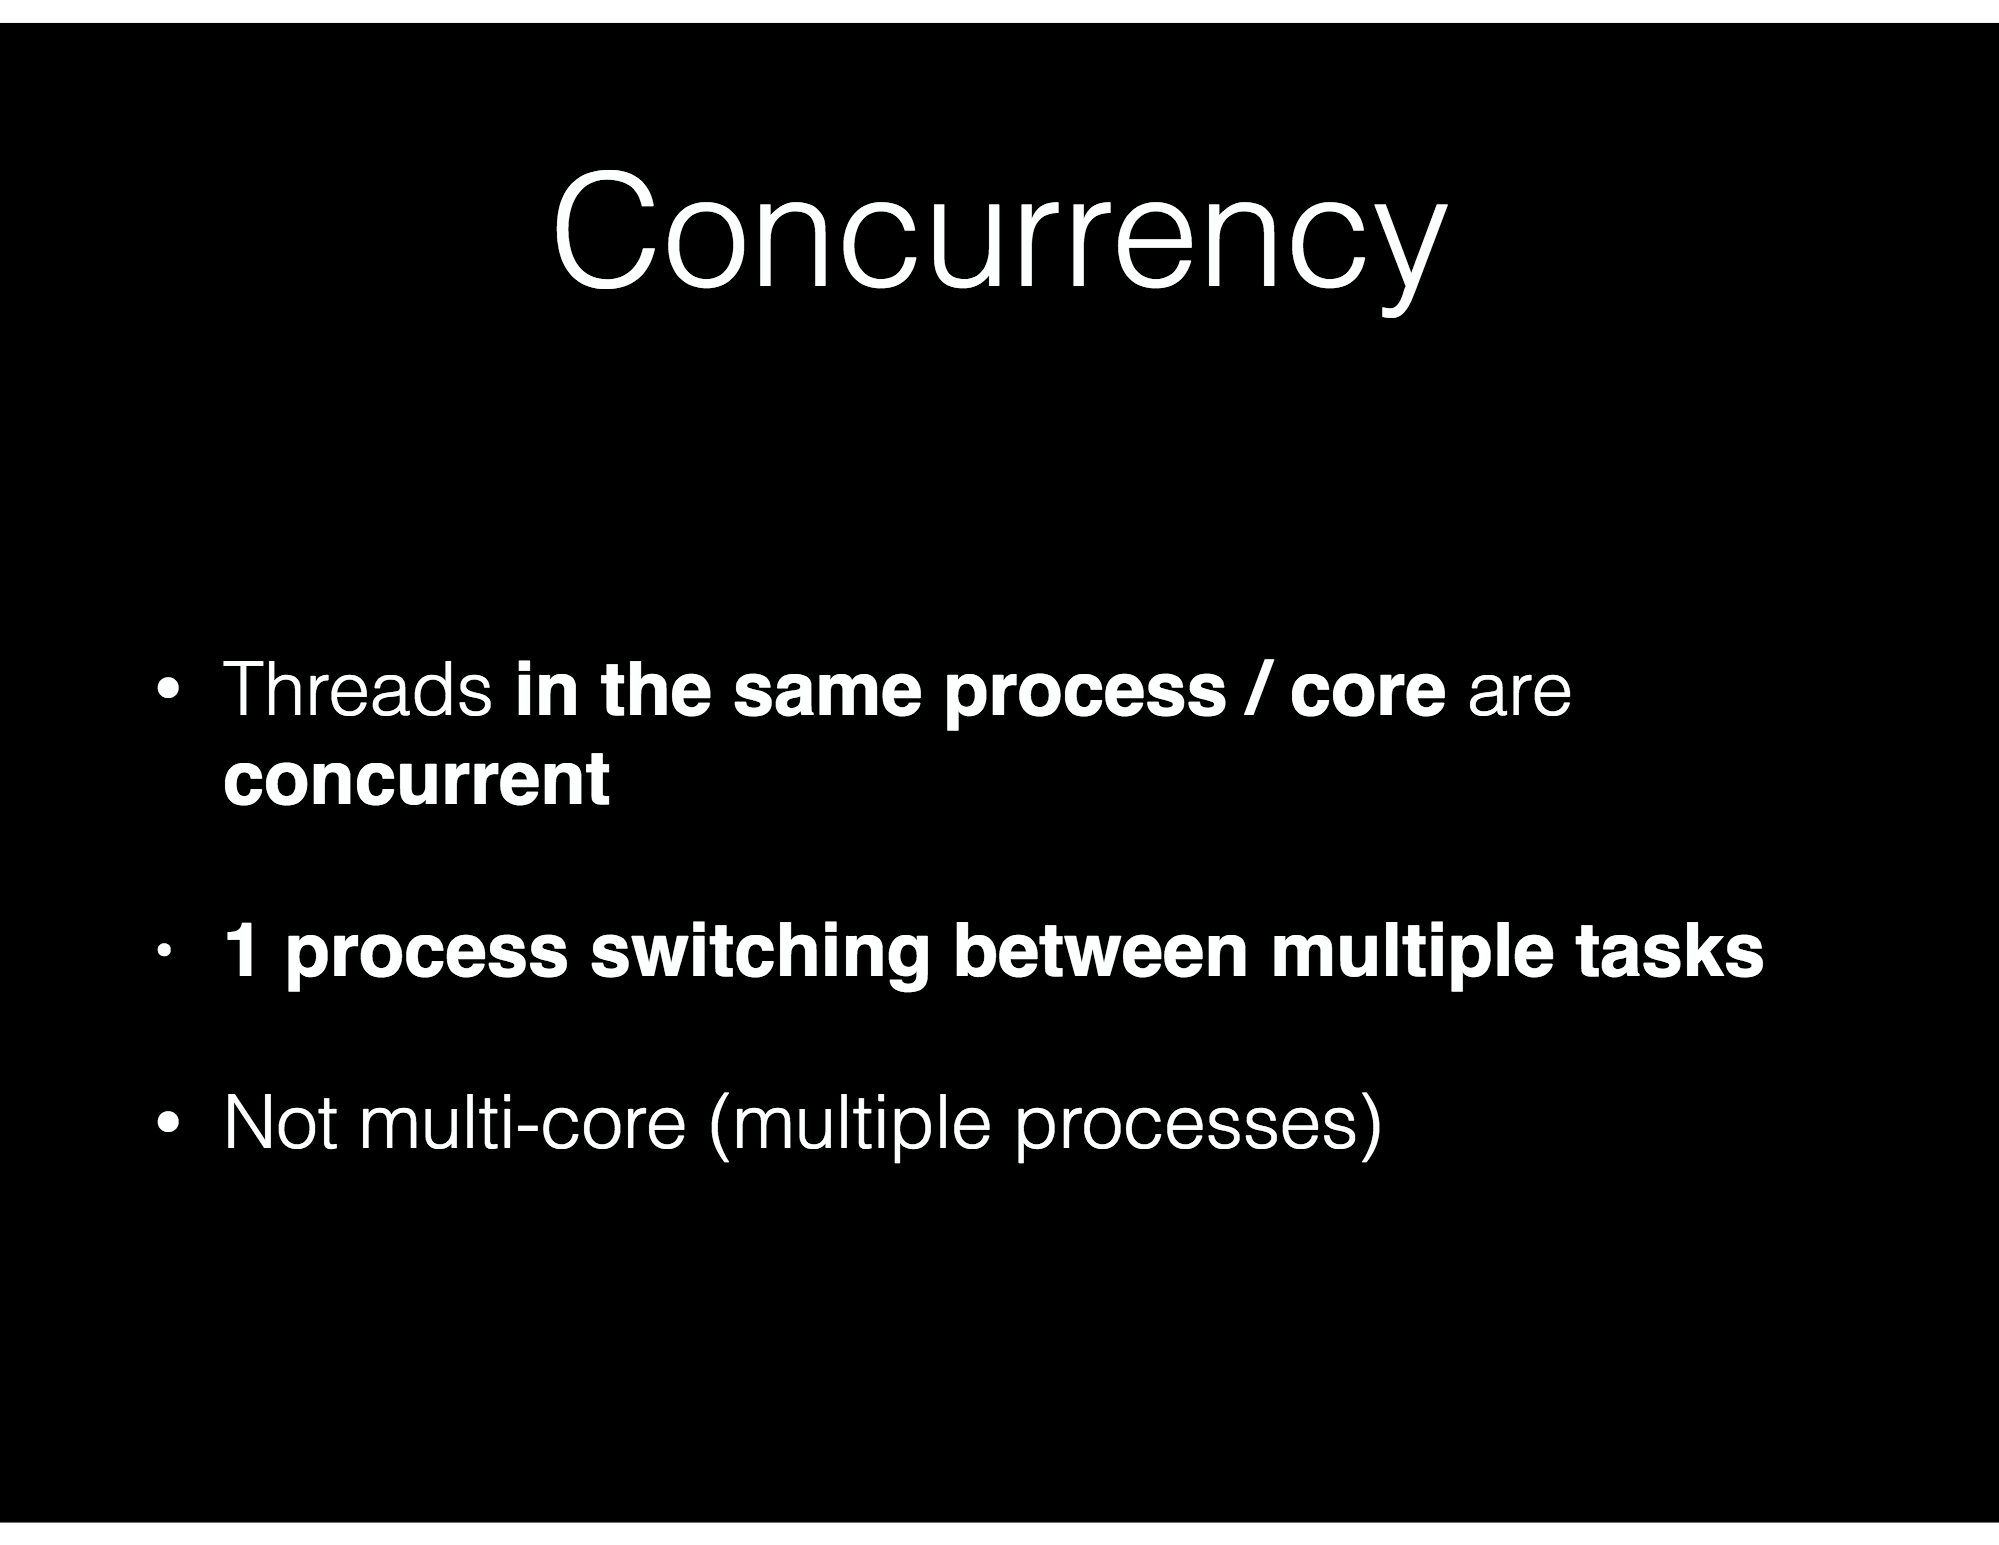

## Concurrency
Concurrency means that an application is making progress on more than one task at the same time (concurrently). Well, if the computer only has one CPU the application may not make progress on more than one task at exactly the same time, but more than one task is being processed at a time inside the application. It does not completely finish one task before it begins the next.

![](http://tutorials.jenkov.com/images/java-concurrency/concurrency-vs-parallelism-1.png)

## Parallelism
Parallelism means that an application splits its tasks up into smaller subtasks which can be processed in parallel, for instance on multiple CPUs at the exact same time.

![](http://tutorials.jenkov.com/images/java-concurrency/concurrency-vs-parallelism-2.png)

## Concurrency vs. Parallelism In Detail
As you can see, concurrency is related to how an application handles multiple tasks it works on. An application may process one task at at time (sequentially) or work on multiple tasks at the same time (concurrently).

Parallelism on the other hand, is related to how an application handles each individual task. An application may process the task serially from start to end, or split the task up into subtasks which can be completed in parallel.

As you can see, an application can be concurrent, but not parallel. This means that it processes more than one task at the same time, but the tasks are not broken down into subtasks.

An application can also be parallel but not concurrent. This means that the application only works on one task at a time, and this task is broken down into subtasks which can be processed in parallel.

Additionally, an application can be neither concurrent nor parallel. This means that it works on only one task at a time, and the task is never broken down into subtasks for parallel execution.

Finally, an application can also be both concurrent and parallel, in that it both works on multiple tasks at the same time, and also breaks each task down into subtasks for parallel execution. However, some of the benefits of concurrency and parallelism may be lost in this scenario, as the CPUs in the computer are already kept reasonably busy with either concurrency or parallelism alone. Combining it may lead to only a small performance gain or even performance loss. Make sure you analyze and measure before you adopt a concurrent parallel model blindly.

### Let's see how we can use multithreading with python:

___

In [ ]:
import multiprocessing as mp
import requests
import sys
import threading
from timeit import Timer

### We first define several helpers to query a website we are interested into:

In [ ]:
def request_item(item_id, return_dict):
    """Requests a spefcific item from algolia API.

    Parameters
    ----------
    item_id: an algolia item id.

    Returns
    -------
    a dict, except in event of requests error, then None.
    """
#     print('Starting thread %s\n' % threading.currentThread().getName())
    try:
        r = requests.get("https://hn.algolia.com/api/v1/items/%s" % item_id)
    except requests.RequestException:
        return None
#     print('Exiting thread %s\n' % threading.currentThread().getName())
    if r.status_code != 404:
        return_dict[item_id] = r.json()

### The following function request the items in a sequential fashion:

In [ ]:
def request_sequential(index_min=1, index_max=20):
    """Requests a specific a bunch of items from algolia.

    Parameters
    ----------
    None

    Returns
    -------
    None.
    """
    sys.stdout.write("Requesting sequentially...\n")

    for item_id in list(range(index_min, index_max)):
        request_item(item_id, {})

    sys.stdout.write("done.\n")

### ... This one request the items in parallel:

In [ ]:
def request_concurrent(index_min=1, index_max=20):
    """Requests a specific bunch of items from algolia IN PARALLEL

    Parameters
    ---------
    None

    Returns
    -------
    None
    """
    sys.stdout.write("Requesting in parallel...\n")

    jobs = []
    manager = mp.Manager()
    return_dict = manager.dict()
    for i in range(index_min, index_max):
        thread = threading.Thread(name=i, target=request_item, args=(i, return_dict))
        jobs.append(thread)
        thread.start()
    print("Waiting for threads to finish execution.")
    for j in jobs:
        j.join()
    return return_dict

### Let's see if this improves the time required to obtain the data:

In [ ]:
t = Timer(lambda: request_sequential())
print("Completed sequential in %s seconds." % t.timeit(1))
print("--------------------------------------")

In [ ]:
t = Timer(lambda: request_concurrent())
print("Completed using threads in %s seconds." % t.timeit(1))

In [ ]:
d_=request_concurrent()

In [ ]:
d_.values()


### Those are the steps required to multiprocess a request:

- Create a helper function with a dictionary placeholder to return the request

- Create an empty list, instantiate the queue manager and the final dictionary place holder that will collect the results of the threads:
```
jobs = []
manager = mp.Manager()
return_dict = manager.dict()
```
- Within a loop, create the threads calling the helper function, and storing them:
```
for i in range(index_min, index_max):
    thread = threading.Thread(name=i, target=request_item, args=(i, return_dict))
    jobs.append(thread)
    thread.start()
```
- Join the results of the requests
```
print("Waiting for threads to finish execution.")
for j in jobs:
    j.join()
```

### In summary:

Running several threads is similar to running several different programs concurrently, but with the following benefits:

- Multiple threads within a process **share the same data space with the main thread** and can therefore share information or communicate with each other more easily than if they were separate processes.

- Threads sometimes called **light-weight processes** and they do not require much memory overhead; they are cheaper than processes.

- A thread has **a beginning, an execution sequence, and a conclusion**. It has an instruction pointer that keeps track of where within its context it is currently running.

- It can **temporarily be put on hold** (also known as sleeping) while other threads are running - this is called yielding.

### Independent practice:

In a similar fashion, you are given a python function to request a Lincoln quotes page. Your task is to use the multithreading module to request the all 13 pages much faster.

In [ ]:
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup

In [ ]:
def request_quotes(index_, return_dict):
    # declare a list
    lincoln_quotes = []

    try:
        # make request for that page
        r = requests.get("https://www.successories.com/iquote/author/291/abraham-lincoln-quotes/%s" % index_)
    except requests.RequestException:
        return None
    
    # Store the HTML
    k = 'Lincoln_'+str(index_)
    return_dict[k] = r.text

In [ ]:
def request_sequential(index_min=1, index_max=20):
    sys.stdout.write("Requesting sequentially...\n")

    for item_id in list(range(index_min, index_max)):
        request_item(item_id, {})

    sys.stdout.write("done.\n")

In [ ]:
t = Timer(lambda: request_sequential())
print("Completed using threads in %s seconds." % t.timeit(1))

In [ ]:
### Write your parallel answer here

## Bonus: Multiprocesses in python

In [ ]:
import math
import multiprocessing
import itertools
from timeit import Timer

In [ ]:
def check_prime(n):
    """Checks if a number is prime.

    Parameters
    ----------
    n: an Int

    Returns
    -------
    Bool
    """
    if n % 2 == 0:
        return False
    for i in range(3, int(math.sqrt(n)) + 1, 2):
        if n % i == 0:
            return False
    return True

In [ ]:
def primes_sequential(number_range):
    """Finds all primes in a sequence.

    Parameters
    ----------
    number_range: an iterable of ints

    Returns
    -------
    list of primes
    """
    primes = []
    for possible_prime in number_range:
        if check_prime(possible_prime):
            primes.append(possible_prime)
    return primes

In [ ]:
def head_tail(primes):
    """Prints first and last 10 entries from a list (of primes here).
    This lets us see the output from our various jobs.

    Parameters
    ----------
    primes: a list

    Returns
    -------
    None. Side effect is print to stdout.
    """
    print(len(primes), primes[:10], primes[-10:])

In [ ]:
def primes_parallel(number_range):
    """Computes primes in parallel using multiprocessing.

    Parameters
    ----------
    number_range: an iterable of ints to check for primeness.

    Returns
    -------
    list of primes
    """
    # multiprocessing.cpu_count() cores used.
    pool = multiprocessing.Pool()
    output = pool.map(check_prime, number_range)  # a list of booleans
    primes = [p for p in itertools.compress(number_range, output)]
    return primes

In [ ]:
number_range = range(10, 2500000) # ~10sec 1 core 

# Make a list of functions to time.
# callables without args...
funcs = [primes_sequential, primes_parallel]
tests = [(test_func.__name__, test_func) for test_func in funcs]

for name, test in tests:
    # We have to do this because Timer takes a callable as an arg.
    t = Timer(lambda: head_tail(test(number_range)))
    print("Completed {name} in {time} seconds.".format(name=name,
                                                       time=t.timeit(1)))